<b>Simple classification learning sandbox </b> <br />
(only uses data from init_games, i.e., only the team comps and the highestAchievedSeasonTiers as an estimate of player elo)

In [1]:
from Learning import *
from Graphing import *

In [11]:
del meta, X, Yc, Yr, X_, Yc_, Yr_

In [2]:
# meta, X_, Yc_, Yr_ = load_games_s(N=int(5e5), conv_meta=True)
# save_learning_data((meta, X_, Yc_, Yr_), "sData_500k_" + str(int(time.time())))
meta, X_, Yc_, Yr_ = load_learning_data("sData_500k_1517862198")
X, Yc, Yr = X_, Yc_, Yr_
# X, Yc, Yr = conv_dlib(X_), conv_dlib(Yc_), conv_dlib(Yr_)
X.shape, Yc.shape, Yr.shape, len(X_r_labels_all) - 10 + (10 * 139), len(Yc_labels_all), len(Yr_labels_all)

((500000, 2498), (500000, 13), (500000, 50), 2283, 13, 50)

In [3]:
indices = np.arange(X.shape[0]); np.random.shuffle(indices) # Shuffle dataset
meta = meta[indices]; X = X[indices]; Yc = Yc[indices]; Yr = Yr[indices]

In [20]:
models = models_c
scorers = scorers_c

models = ["RandomForestClassifier"]
scorers = ["multitask_acc"]

# Y_labels = ["blue_win"]
Y_labels = ["blue_win"]
# Y_labels = ["blue_win", "blue_first_tower", "blue_first_dragon", "blue_first_inhib"]
# Y_labels = ["blue_win", "blue_first_blood", "blue_first_tower", "blue_rift_herald",
#             "blue_first_dragon", "blue_first_baron", "blue_first_inhib"]
# Y_labels = Yc_r_labels_all

Y = Yc[:, [Yc_labels_all.index(l) for l in Y_labels]]
_X = X

# two_months_ago = (time.time() - (60 * 24.0 * 60.0 * 60.0)) * 1000 # Recent games only filter
# new_is = np.nonzero(X[:, -n_patches-n_seasons-n_regions-3] < two_months_ago)
# Y = Yc[new_is, [Yc_labels_all.index(l) for l in Y_labels]].T
# _X = X[new_is]
# _X = _X[:, :1390]

# Train Multi-task models on interval_size-sample increments of data
interval_size = 25000
ns_samples = list(np.arange(0, _X.shape[0], interval_size))[1:7]# + [ _X.shape[0] ]

# Take ns_eval_samples samples of random x for each increment, to get accurate results at low n
ns_eval_samples = [5] * len(ns_samples)

# Number of test samples
n_test = 5000
X_train, Y_train, X_test, Y_test = _X[:-n_test], Y[:-n_test], _X[-n_test:], Y[-n_test:]
blue_win_perc = 100.0 * np.mean(Y_test[:, 0]) # Check blue win percentage
models, scorers, _X.shape, Y.shape, ns_samples, ns_eval_samples, blue_win_perc

(['RandomForestClassifier'],
 ['multitask_acc'],
 (500000, 2498),
 (500000, 1),
 [25000, 50000, 75000, 100000, 125000, 150000],
 [5, 5, 5, 5, 5, 5],
 49.899999999999999)

In [21]:
# Perform cross validation prediction
Y_pr = do_learning_curve(X_train, Y_train, X_test, models, ns_samples, ns_eval_samples)
save_learning_data((X_test, Y_test, Y_pr, Y_labels,models,ns_samples,ns_eval_samples), "sPreds_all_" + str(int(time.time())))
# X_test, Y_test, Y_pr, Y_labels, models, ns_samples, ns_eval_samples = load_learning_data("sPreds_all_1515732849")
len(Y_pr), len(Y_pr[-1]), len(Y_pr[-1][-1]), Y_pr[-1][-1][-1].shape, blue_win_perc

(1, 6, 5, (5000, 1), 49.899999999999999)

	RandomForestClassifier
'multitask_acc: [0.506, 0.511, 0.511, 0.508, 0.51, 0.511]'


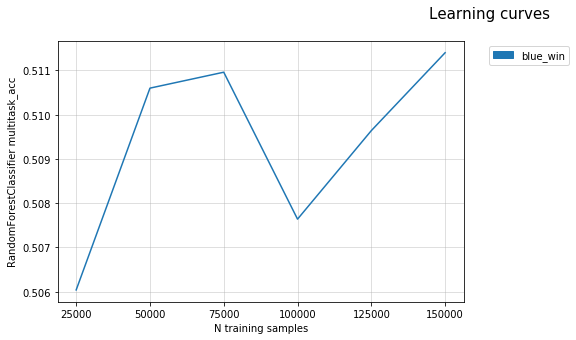

In [22]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print_learning_curve_mean_scores(models, scorers, scores, Y_labels, ["blue_win"]);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels)

	RandomForestClassifier
'multitask_acc: [0.511, 0.508, 0.509, 0.51, 0.512]'
'f1_score: [0.442, 0.439, 0.438, 0.444, 0.446]'
'recall_score: [0.388, 0.387, 0.383, 0.392, 0.393]'
'precision_score: [0.513, 0.509, 0.51, 0.512, 0.514]'
	MLPClassifier
'multitask_acc: [0.516, 0.515, 0.517, 0.518, 0.518]'
'f1_score: [0.517, 0.521, 0.515, 0.516, 0.515]'
'recall_score: [0.521, 0.53, 0.514, 0.515, 0.512]'
'precision_score: [0.515, 0.514, 0.516, 0.517, 0.517]'


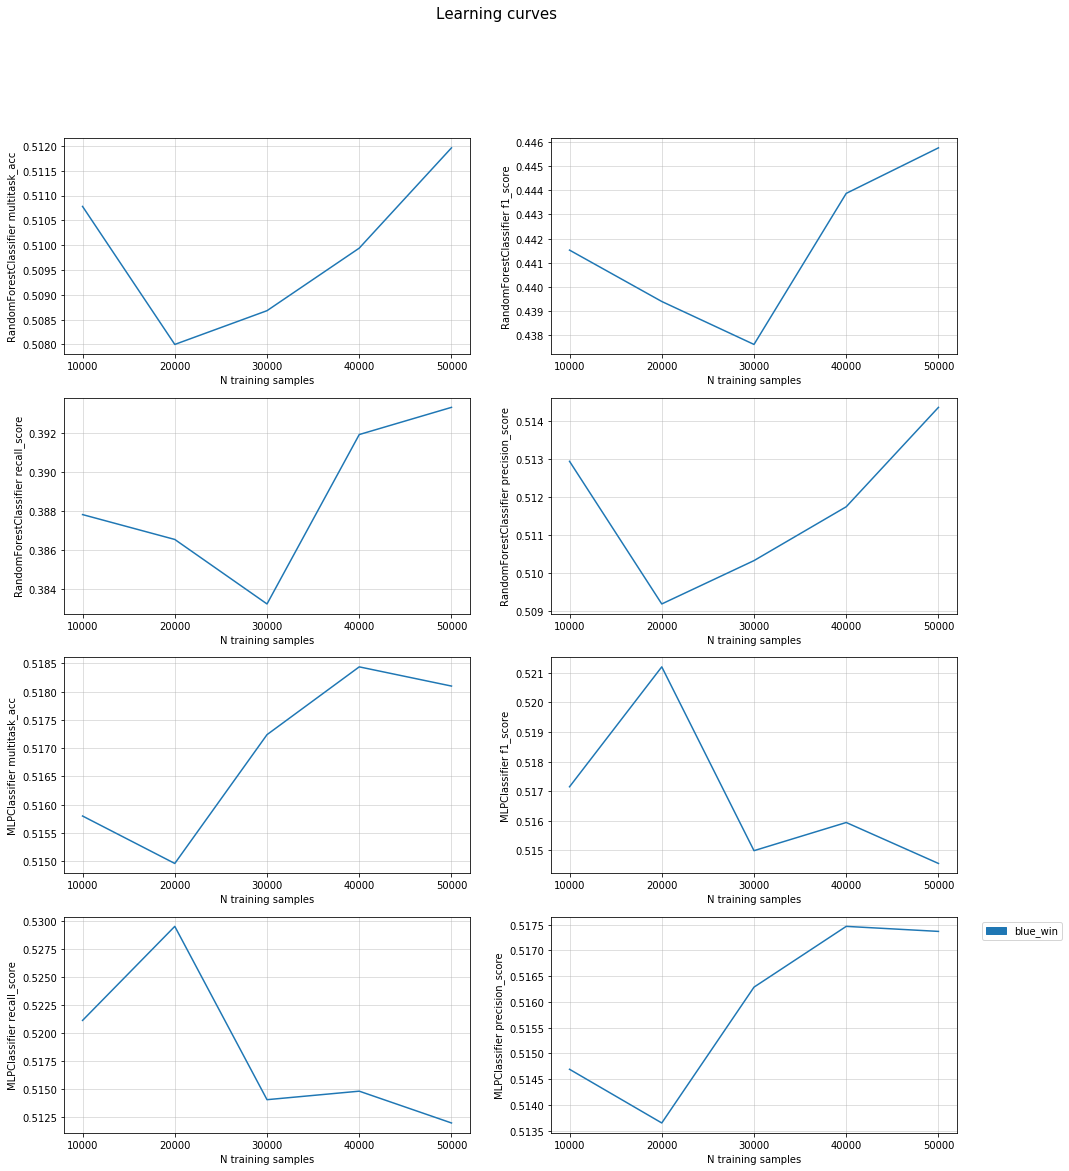

In [14]:
scores = score_learning_curve(Y_test, Y_pr, models, ns_samples, ns_eval_samples, scorers)
print_learning_curve_mean_scores(models, scorers, scores, Y_labels, ["blue_win"]);# print()
graph_learning_curve(models, scorers, scores, ns_samples, Y_labels)

In [12]:
# For debug: convert x data into random numbers & try to learn
# X = np.random.random((X.shape[0], 2))
# Y_pr = do_cv_learning_curve(X, Y, models, ns_samples, ns_eval_samples, cv=3) # Result includes sample indices used
# scores = score_learning_curve(Y, Y_pr, models, ns_samples, ns_eval_samples, scorers)
# print_learning_curve_mean_scores(models, scorers, scores, Y_labels, ["blue_win"]); print()
# graph_learning_curve(models, scorers, scores, ns_samples, Y_labels)